## Deep Learning
### Examen Agosto 2022

#### Alumna: Ariadna Garmendia

In [1624]:
import math
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [1625]:
dataset = pd.read_csv('dataset_1.csv')
dataset = pd.DataFrame(dataset)
dataset.head()

,# X,Y
0,1.791979,4.952906
1,0.846885,1.424248
2,1.000300,0.454364
3,1.884188,6.681510
4,0.889089,1.211691


In [1626]:
dataset.rename(columns = {'# X':'X'}, inplace = True)
dataset.head()

,X,Y
0,1.791979,4.952906
1,0.846885,1.424248
2,1.000300,0.454364
3,1.884188,6.681510
4,0.889089,1.211691


In [1627]:
X = dataset.X.to_numpy()
y = dataset.Y.to_numpy()

X.shape, y.shape

((10000,), (10000,))

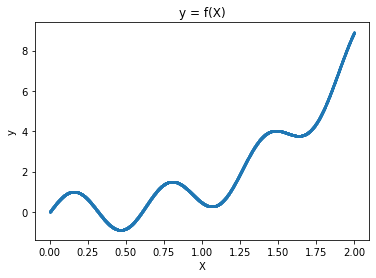

In [1628]:
# Grafico función de entrada
plt.figure()
plt.scatter(X, y,1)
plt.title('y = f(X)')
plt.ylabel('y')
plt.xlabel('X')
plt.show()

#### Voy a reutilizar un código que yo creé para el TP2 que implementa mini-batch sin librerías. Lo único que voy a cambiar son las derivadas del backpropagation.

In [1629]:

def mini_batch(X,y, n_batches, n_epochs, alpha):
    batch_size = int(len(X)/n_batches)
    n_epochs = n_epochs
    alpha = alpha
    # Paso 1 - Inicializar w y b con distribución U(-1,1)
    w1 = random.uniform(-1,1) 
    w2 = random.uniform(-1,1)
    b1 = random.uniform(-1,1)
    #Inicializo gradientes en cero
    dw1 = 0
    dw2 = 0
    db = 0
    err = []
    err_2 = 0

    
    MSE=[] # Acá voy ir guardando los MSE para cada Epoch

    for epoch in range(n_epochs): # Iteracion por cada epoch
        err = []
        err_2 = 0
        y_hat = []
        for b in range(n_batches): # Iteracion por cada mini-batch

            for bs in range(batch_size): # Recorro las muestas adentro del mini-batch
                i = bs + (b*batch_size)
            # Step1: Forward Propagation
                y_hat.append(w1 * X[i]**3 + w2 * X[i]**2 + w1 * X[i] + b1)
            
            # Step2: Error
                err.append(y[i] - y_hat[i])
                err_2 += (err[i])**2

            #Step 3: Backpropagation
            dw1 = -2/batch_size * err[b] * (X[b]**3 + X[b])
            dw2 = -2/batch_size * err[b] * X[b]**2
            db1 = -2/batch_size * err[b]

            #Step4: Actualización de los pesos
            w1 -= alpha * dw1
            w2 -= alpha * dw2
            b1 -= alpha * db1
           
        MSE.append(err_2/n_batches) # Luego graficar MSE vs Epochs
    return MSE, w1, w2, b1

In [1630]:
#Pruebo con n_batches=10, n_epochs=10000 y alpha=0.0001
MSE, w1, w2, b1 = mini_batch(X,y, n_batches=10, n_epochs=10000, alpha=0.01)

Text(0, 0.5, 'MSE')

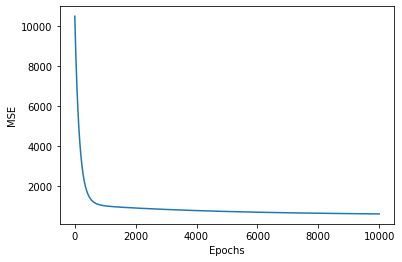

In [1631]:
# Grafico MSE en función de las Epochs
plt.plot(MSE)
plt.xlabel("Epochs")
plt.ylabel("MSE")

In [1632]:
min(MSE)

606.6513457001154

#### Calculo las predicciones con los pesos obtenidos:

In [1633]:
y_pred = w1 * X**3 + w2 * X**2 + w1 * X + b1

Grafico y e y_pred

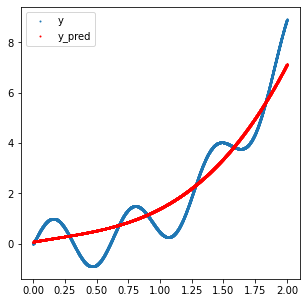

In [1634]:

plt.figure(figsize=[5,5])
plt.scatter(X, y, 1) # Función original
plt.scatter(X, y_pred,1, 'r') # Predicción
plt.legend(['y', 'y_pred'])
plt.show()

#### Conclusión: El modelo está haciendo underfitting. Esto sucede porque el modelo implementa un poliomio de grado 3 que no es suficiente como para representar una función con la complejidad que tiene la función de entrada. Como consencuencia, el error se mantiene a un nivel alto aun aumentando las epochs.